In [4]:
!pip install imbalanced-learn==0.10.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# Step 1: EDA (Corrected)

Shape: (36275, 19)

Dtypes:
 Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

Missing values:
 Booking_ID                 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


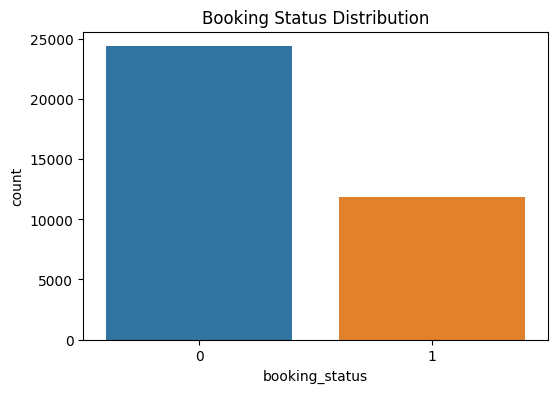

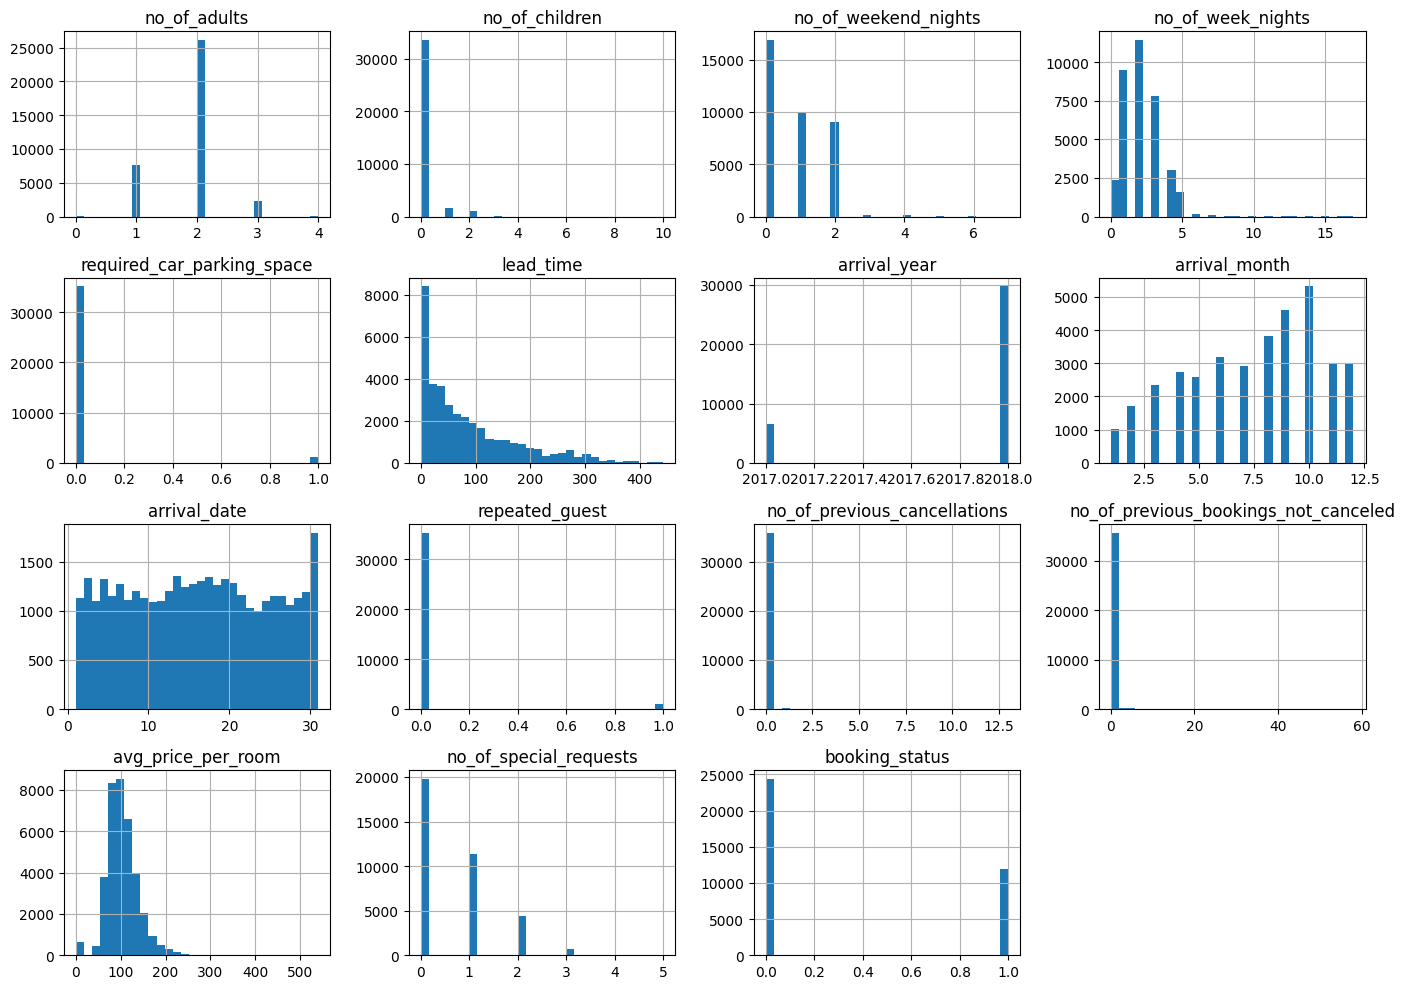

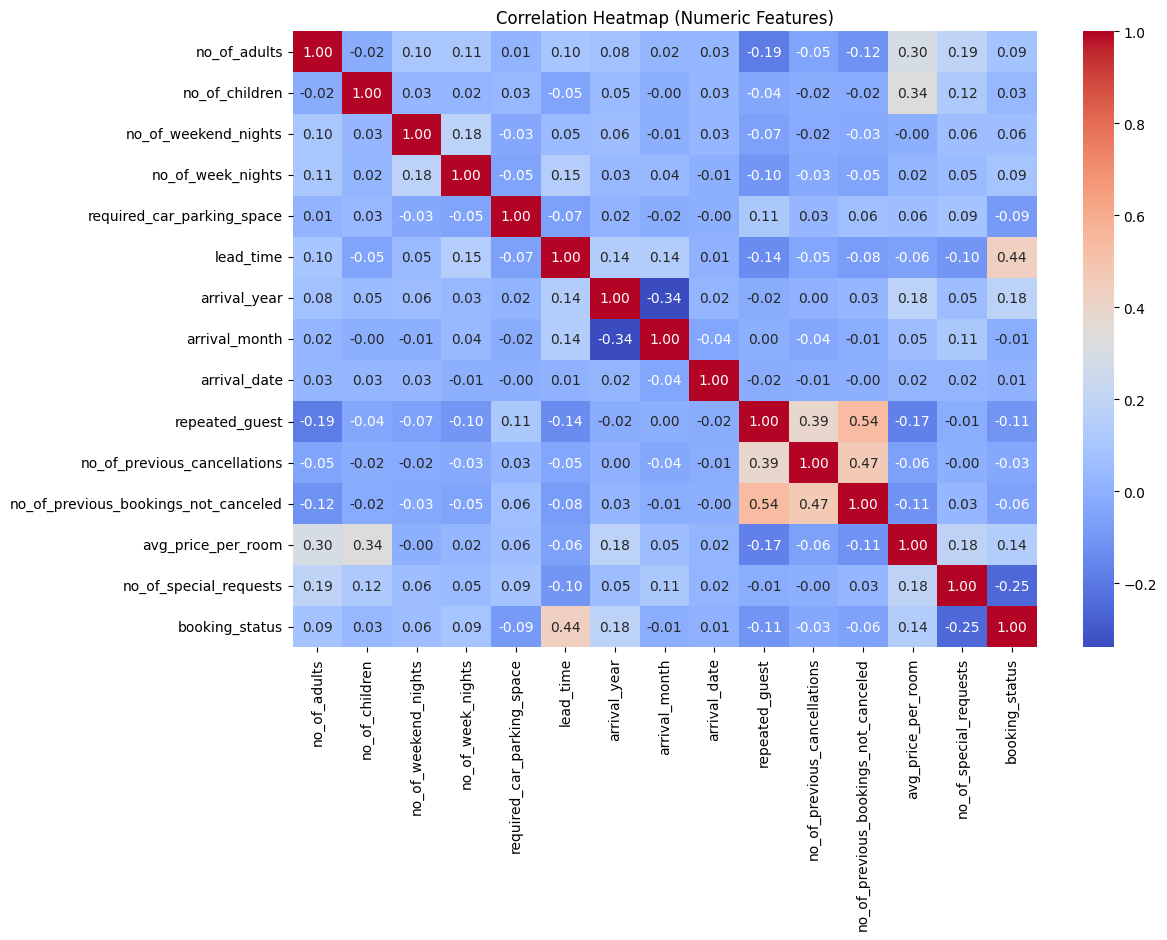

In [15]:
# Step 1: EDA (Corrected)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
pd.set_option('display.max_columns', None)

# Convert booking_status to numeric BEFORE correlation
df['booking_status'] = df['booking_status'].map({
    'Canceled': 1,
    'Not_Canceled': 0
})

# Basic Info
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

display(df.head())

# Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='booking_status', data=df)
plt.title("Booking Status Distribution")
plt.show()

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Histograms
df[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# data cleaning

In [20]:
df['booking_status'].unique()


array([0, 1])

In [21]:
df_clean = df.copy()

# DO NOT MAP booking_status (already numeric)
print(df_clean['booking_status'].unique())

# Fix missing values
df_clean['no_of_children'] = df_clean['no_of_children'].fillna(0)

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Convert numeric fields explicitly
df_clean['arrival_year'] = df_clean['arrival_year'].astype(int)
df_clean['arrival_month'] = df_clean['arrival_month'].astype(int)
df_clean['arrival_date'] = df_clean['arrival_date'].astype(int)

df_clean.reset_index(drop=True, inplace=True)

print(df_clean.isnull().sum())


[0 1]
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [22]:
df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


# FEATURE ENGINEERING (Minimum 5 New Features)

In [23]:
# Step 3: Feature Engineering
df_fe = df_clean.copy()

# ------------------------------
# 1) Total nights (stay duration)
# ------------------------------
df_fe['total_nights'] = df_fe['no_of_weekend_nights'] + df_fe['no_of_week_nights']

# Why? Longer stays may cancel more or less often depending on nature of trip.

# ------------------------------
# 2) Total guests
# ------------------------------
df_fe['total_guests'] = df_fe['no_of_adults'] + df_fe['no_of_children']
df_fe['total_guests'] = df_fe['total_guests'].replace(0, 1)  # Avoid division by zero

# Why? Larger groups behave differently (group bookings cancel differently).

# ------------------------------
# 3) Lead time category
# ------------------------------
df_fe['lead_time_cat'] = pd.cut(
    df_fe['lead_time'],
    bins=[-1, 7, 30, 90, 365, df_fe['lead_time'].max()+1],
    labels=['<1w', '1w-1m', '1m-3m', '3m-1y', '>1y']
)

# Why? Long lead-time bookings tend to cancel more often.

# ------------------------------
# 4) ADR per person (price per guest)
# ------------------------------
df_fe['adr_per_person'] = df_fe['avg_price_per_room'] / df_fe['total_guests']

# Why? More expensive per-person stays may have different cancellation patterns.

# ------------------------------
# 5) Weekend booking flag
# ------------------------------
df_fe['is_weekend_booking'] = (df_fe['no_of_weekend_nights'] > 0).astype(int)

# Why? Weekend = more leisure trips → different cancellation behavior.

# ------------------------------
# 6) Arrival season (optional but useful)
# ------------------------------
season_map = {
    12:'Winter',1:'Winter',2:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:'Summer',7:'Summer',8:'Summer',
    9:'Fall',10:'Fall',11:'Fall'
}
df_fe['arrival_season'] = df_fe['arrival_month'].map(season_map)

# Why? Seasonality affects cancellations (summer holidays vs off-season).

# ------------------------------
# 7) Was the guest repeated?
# ------------------------------
df_fe['is_repeated_guest'] = (df_fe['repeated_guest'] > 0).astype(int)

# Why? Repeated guests rarely cancel compared to new guests.

# Preview new features
df_fe[['total_nights','total_guests','lead_time','lead_time_cat','adr_per_person','is_weekend_booking','arrival_season','is_repeated_guest']].head()


,total_nights,total_guests,lead_time,lead_time_cat,adr_per_person,is_weekend_booking,arrival_season,is_repeated_guest
0,3,2,224,3m-1y,32.50,1,Fall,0
1,5,2,5,<1w,53.34,1,Fall,0
2,3,1,1,<1w,60.00,1,Winter,0
3,2,2,211,3m-1y,50.00,0,Spring,0
4,2,2,48,1m-3m,47.25,1,Spring,0


# OUTLIER DETECTION & TREATMENT

          lead_time  avg_price_per_room  adr_per_person
count  36275.000000        36275.000000    36275.000000
mean      85.232557          103.423539       57.554657
std       85.930817           35.089424       25.517541
min        0.000000            0.000000        0.000000
1%         0.000000            0.000000        0.000000
5%         1.000000           61.000000       30.661500
25%       17.000000           80.300000       42.000000
50%       57.000000           99.450000       51.750000
75%      126.000000          120.000000       66.012500
95%      273.000000          165.000000      110.000000
99%      346.000000          208.000000      140.400000
max      443.000000          540.000000      279.200000


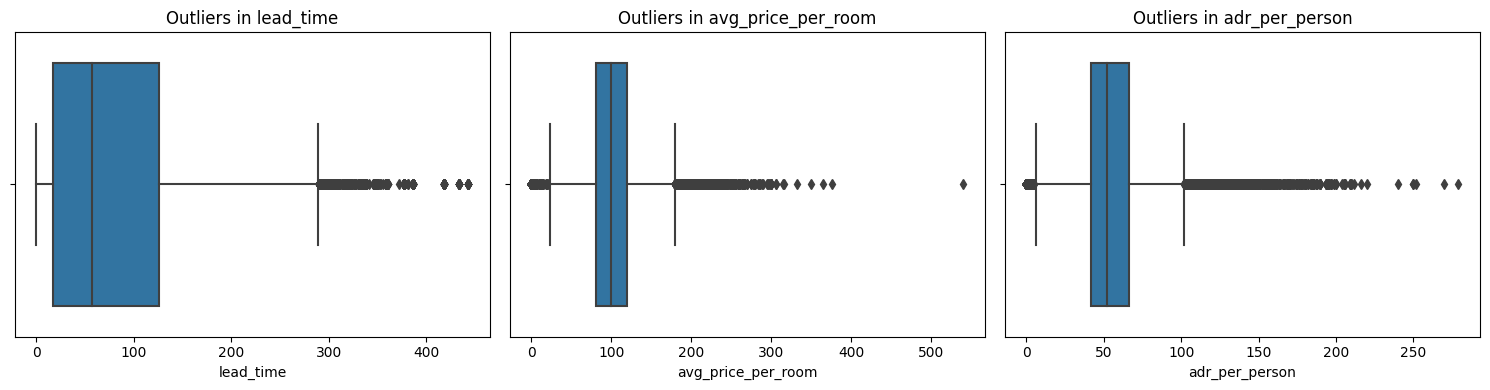

In [25]:
# Step 4: Outlier Detection & Treatment
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_out = df_fe.copy()

# ------------------------
# 1. Detect Outliers
# ------------------------

num_cols_to_check = ['lead_time', 'avg_price_per_room', 'adr_per_person']

print(df_out[num_cols_to_check].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]))


# ------------------------
# 2. Visualize Outliers — Boxplots
# ------------------------

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols_to_check):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df_out[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()




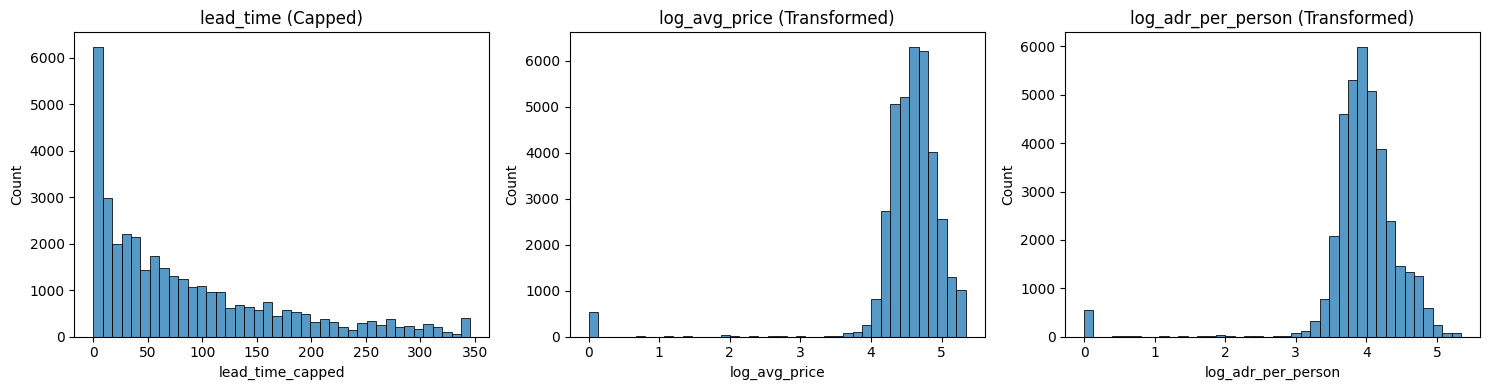

,lead_time,lead_time_capped,avg_price_per_room,avg_price_capped,adr_per_person,adr_per_person_capped
0,224,224.0,65.00,65.00,32.50,32.50
1,5,5.0,106.68,106.68,53.34,53.34
2,1,1.0,60.00,60.00,60.00,60.00
3,211,211.0,100.00,100.00,50.00,50.00
4,48,48.0,94.50,94.50,47.25,47.25


In [26]:
# ------------------------
# 3. Apply Outlier Treatment
#    - Winsorization (capping at 99th percentile)
#    - Log-transform for heavily skewed columns
# ------------------------

# Lead time capping
lt_99 = df_out['lead_time'].quantile(0.99)
df_out['lead_time_capped'] = np.where(df_out['lead_time'] > lt_99, lt_99, df_out['lead_time'])

# ADR capping
adr_99 = df_out['avg_price_per_room'].quantile(0.99)
df_out['avg_price_capped'] = np.where(df_out['avg_price_per_room'] > adr_99, adr_99, df_out['avg_price_per_room'])

# ADR-per-person capping
df_out['adr_per_person_capped'] = np.where(df_out['adr_per_person'] > adr_99, adr_99, df_out['adr_per_person'])

# Log transform (stabilizes variance)
df_out['log_avg_price'] = np.log1p(df_out['avg_price_capped'])
df_out['log_adr_per_person'] = np.log1p(df_out['adr_per_person_capped'])


# ------------------------
# 4. Visualize transformed distributions
# ------------------------

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df_out['lead_time_capped'], bins=40)
plt.title("lead_time (Capped)")

plt.subplot(1,3,2)
sns.histplot(df_out['log_avg_price'], bins=40)
plt.title("log_avg_price (Transformed)")

plt.subplot(1,3,3)
sns.histplot(df_out['log_adr_per_person'], bins=40)
plt.title("log_adr_per_person (Transformed)")

plt.tight_layout()
plt.show()


# ------------------------
# Final check
# ------------------------
df_out[['lead_time','lead_time_capped','avg_price_per_room','avg_price_capped','adr_per_person','adr_per_person_capped']].head()


# ENCODING CATEGORICAL VARIABLES

In [27]:
# Step 5: Encoding Setup
df_model = df_out.copy()

# Remove columns that are useless for modeling
if 'Booking_ID' in df_model.columns:
    df_model = df_model.drop(columns=['Booking_ID'])

# Separate target
y = df_model['booking_status']
X = df_model.drop(columns=['booking_status'])

# Identify column types
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

num_cols, cat_cols


(['no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'no_of_week_nights',
  'required_car_parking_space',
  'lead_time',
  'arrival_year',
  'arrival_month',
  'arrival_date',
  'repeated_guest',
  'no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room',
  'no_of_special_requests',
  'total_nights',
  'total_guests',
  'adr_per_person',
  'is_weekend_booking',
  'is_repeated_guest',
  'lead_time_capped',
  'avg_price_capped',
  'adr_per_person_capped',
  'log_avg_price',
  'log_adr_per_person'],
 ['type_of_meal_plan',
  'room_type_reserved',
  'market_segment_type',
  'lead_time_cat',
  'arrival_season'])

In [28]:
# Split categorical columns by number of unique values
high_card = [c for c in cat_cols if X[c].nunique() > 20]
low_card = [c for c in cat_cols if c not in high_card]

print("Low-cardinality categorical:", low_card)
print("High-cardinality categorical:", high_card)


Low-cardinality categorical: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'lead_time_cat', 'arrival_season']
High-cardinality categorical: []


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Low-card categorical → OneHotEncoder
low_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# High-card categorical → OrdinalEncoder
high_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('low_cat', low_cat_pipeline, low_card),
        ('high_cat', high_cat_pipeline, high_card)
    ],
    remainder='drop',
    sparse_threshold=0
)

preprocessor


ColumnTransformer(sparse_threshold=0,
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'required_car_parking_space', 'lead_time',
                                  'arrival_year', 'arrival_month',
                                  'arrival_date', 'repeated_guest',
                                  'no_of_previous_cance...
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type', 'lead_time_cat',
                                  'arrival_season']),
                                ('high_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 [])])

# Step 6: Class Imbalance Check


In [31]:

print("Class distribution:")
print(y.value_counts())
print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)


Class distribution:
booking_status
0    24390
1    11885
Name: count, dtype: int64

Percentage distribution:
booking_status
0    67.236389
1    32.763611
Name: proportion, dtype: float64


In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE:")
print(y_train.value_counts())


Before SMOTE:
booking_status
0    19512
1     9508
Name: count, dtype: int64


In [36]:
# SMOTE-ready pipeline (model will be added in Step 7)
def make_pipeline(model):
    return ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])


In [37]:
print(y_train.value_counts())


booking_status
0    19512
1     9508
Name: count, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)


In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="logloss",
        learning_rate=0.05,
        n_estimators=300,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}


In [40]:
results = {}

for name, model in models.items():
    print(f"\n================ Training: {name} ================\n")
    
    # Create pipeline with SMOTE + preprocessing + model
    pipe = make_pipeline(model)
    
    # Fit
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    # Store results
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "pipeline": pipe
    }
    
    print(f"{name} Results:")
    print(f"Accuracy:  {results[name]['accuracy']:.4f}")
    print(f"Precision: {results[name]['precision']:.4f}")
    print(f"Recall:    {results[name]['recall']:.4f}")
    print(f"F1 Score:  {results[name]['f1']:.4f}")
    print(f"ROC-AUC:   {results[name]['roc_auc']:.4f}")



================ Training: Logistic Regression ================

Logistic Regression Results:
Accuracy:  0.7865
Precision: 0.6428
Recall:    0.7842
F1 Score:  0.7065
ROC-AUC:   0.8783

================ Training: Random Forest ================

Random Forest Results:
Accuracy:  0.9030
Precision: 0.8658
Recall:    0.8330
F1 Score:  0.8491
ROC-AUC:   0.9562

================ Training: XGBoost ================

XGBoost Results:
Accuracy:  0.8921
Precision: 0.8400
Recall:    0.8284
F1 Score:  0.8341
ROC-AUC:   0.9519


In [41]:
import pandas as pd

comparison_df = pd.DataFrame({
    name: {
        "Accuracy": results[name]["accuracy"],
        "Precision": results[name]["precision"],
        "Recall": results[name]["recall"],
        "F1 Score": results[name]["f1"],
        "ROC-AUC": results[name]["roc_auc"]
    }
    for name in results
}).T

print("\n============== MODEL COMPARISON ==============\n")
display(comparison_df.sort_values("ROC-AUC", ascending=False))



============== MODEL COMPARISON ==============



,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest,0.902963,0.865763,0.832983,0.849057,0.956234
XGBoost,0.892074,0.840017,0.828355,0.834145,0.951922
Logistic Regression,0.786492,0.642759,0.784182,0.706462,0.878305


In [42]:
best_model_name = comparison_df["ROC-AUC"].idxmax()
best_model = results[best_model_name]["pipeline"]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print("ROC-AUC:", comparison_df.loc[best_model_name, "ROC-AUC"])



🏆 BEST MODEL: Random Forest
ROC-AUC: 0.9562341321772495


In [43]:
import joblib

save_path = f"/kaggle/working/best_model_{best_model_name.replace(' ','_')}.joblib"
joblib.dump(best_model, save_path)

print("\nModel saved to:", save_path)



Model saved to: /kaggle/working/best_model_Random_Forest.joblib


In [44]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import xgboost as xgb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [45]:
xgb_base = xgb.XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)


In [46]:
param_dist = {
    'clf__n_estimators': [200, 300, 500, 700],
    'clf__max_depth': [3, 4, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 1, 3, 5],
}


In [47]:
pipe_for_tuning = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', xgb_base)
])


In [48]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipe_for_tuning,
    param_distributions=param_dist,
    n_iter=20,                      # number of random trials
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [49]:
random_search.fit(X_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['no_of_adults',
                                                                                'no_of_children',
                                                                                'no_of_weekend_nights',
                                                                                'no_of_week_nights',
                                                                                'req...
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'clf__colsample_bytree': [0.6, 0.8,
                                                                  1.0],
                                        'clf__gamma': [0, 1, 3, 5],
                                        'clf__learning_rate': [0.01, 0.03, 0.05,
                                                               0.1],
                                        'clf__max_depth': [3, 4, 5, 7, 9],
                                        'clf__n_estimators': [200, 300, 500,
                                                              700],
                                        'clf__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [50]:
print("Best ROC-AUC from CV:", random_search.best_score_)
print("\nBest Hyperparameters:")
for k, v in random_search.best_params_.items():
    print(f"{k}: {v}")


Best ROC-AUC from CV: 0.9526402034634567

Best Hyperparameters:
clf__subsample: 0.6
clf__n_estimators: 300
clf__max_depth: 9
clf__learning_rate: 0.1
clf__gamma: 1
clf__colsample_bytree: 1.0


In [51]:
best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print("\n=== Tuned XGBoost Performance on Test Set ===")
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



=== Tuned XGBoost Performance on Test Set ===
ROC-AUC: 0.9588163645624677
Accuracy: 0.9031013094417643
Precision: 0.8661417322834646
Recall: 0.8329827513672696
F1 Score: 0.8492386875402101
[CV] END clf__colsample_bytree=0.6, clf__gamma=5, clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=500, clf__subsample=1.0; total time=   3.1s
[CV] END clf__colsample_bytree=0.8, clf__gamma=1, clf__learning_rate=0.03, clf__max_depth=5, clf__n_estimators=700, clf__subsample=0.8; total time=   6.8s
[CV] END clf__colsample_bytree=0.8, clf__gamma=0, clf__learning_rate=0.05, clf__max_depth=9, clf__n_estimators=200, clf__subsample=1.0; total time=   5.2s
[CV] END clf__colsample_bytree=0.8, clf__gamma=0, clf__learning_rate=0.05, clf__max_depth=4, clf__n_estimators=300, clf__subsample=0.6; total time=   2.9s
[CV] END clf__colsample_bytree=0.8, clf__gamma=3, clf__learning_rate=0.1, clf__max_depth=4, clf__n_estimators=500, clf__subsample=0.6; total time=   3.7s
[CV] END clf__colsample_bytree=1.0, 


=== Classification Report ===

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4878
           1       0.87      0.83      0.85      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.89      0.89      7255
weighted avg       0.90      0.90      0.90      7255



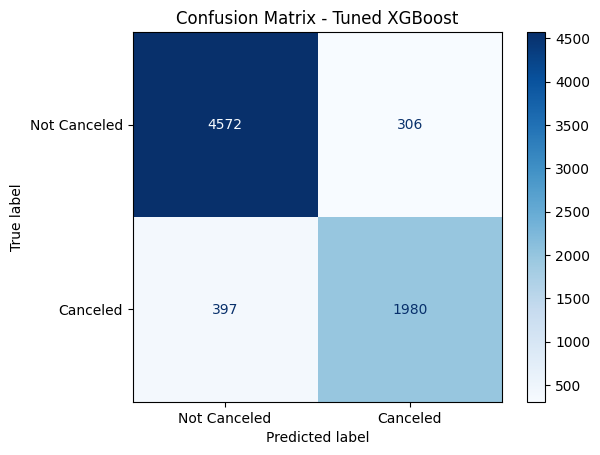


=== Top 20 Most Important Features ===



market_segment_type_Online              0.164754
lead_time_cat_<1w                       0.106227
lead_time_cat_3m-1y                     0.065632
total_guests                            0.049349
no_of_special_requests                  0.048707
required_car_parking_space              0.047375
arrival_season_Winter                   0.028235
lead_time                               0.027527
arrival_year                            0.022450
repeated_guest                          0.022390
market_segment_type_Complementary       0.020742
market_segment_type_Offline             0.020277
is_weekend_booking                      0.019276
arrival_season_Fall                     0.016763
market_segment_type_Corporate           0.016280
arrival_month                           0.015897
no_of_previous_bookings_not_canceled    0.015062
room_type_reserved_Room_Type 5          0.014950
avg_price_per_room                      0.014461
no_of_weekend_nights                    0.013840
dtype: float32

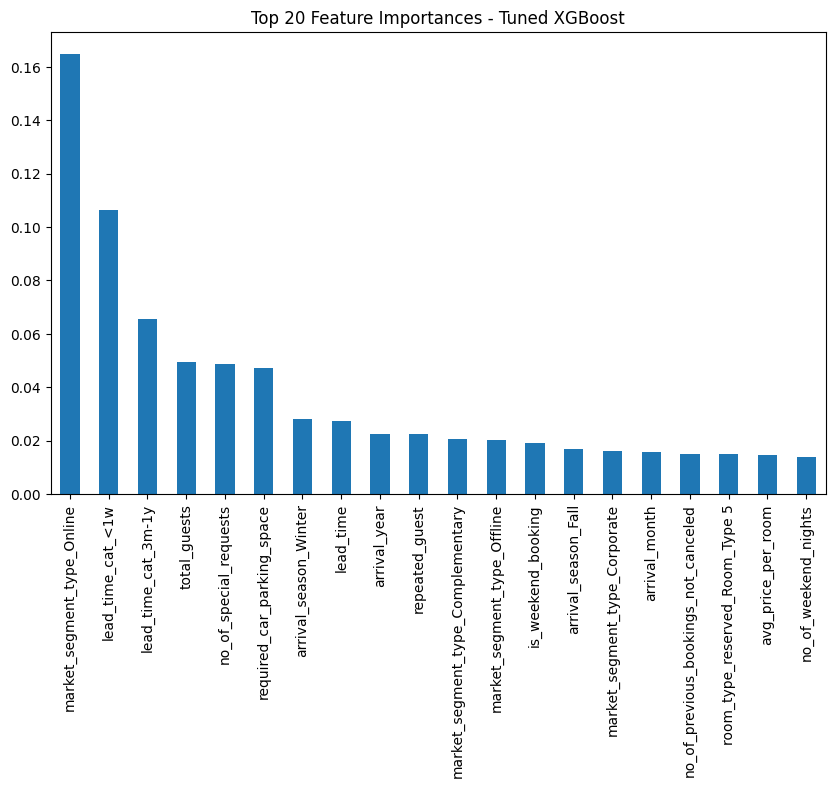

In [52]:
# Step 9: Final Evaluation & Interpretation

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Already have y_pred, y_proba from tuned model
print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled','Canceled'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

# -------------------------------
# Feature Importance Extraction
# -------------------------------

# Get feature names after preprocessing
def get_feature_names(ct):
    output = []
    for name, trans, cols in ct.transformers_:
        if name == 'num':
            output.extend(cols)
        elif name == 'low_cat':
            encoder = trans.named_steps['ohe']
            ohe_columns = encoder.get_feature_names_out(cols)
            output.extend(ohe_columns)
        elif name == 'high_cat':
            output.extend(cols)
    return output

feature_names = get_feature_names(best_xgb.named_steps['preprocessor'])
importances = best_xgb.named_steps['clf'].feature_importances_

# Top 20 features
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

print("\n=== Top 20 Most Important Features ===\n")
display(feat_imp)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Top 20 Feature Importances - Tuned XGBoost")
plt.show()


# Model Comparison & Selection

Three machine learning models were trained on the same preprocessed and SMOTE-balanced dataset:

Logistic Regression

Random Forest Classifier

XGBoost Classifier

The comparison was based on Accuracy, Precision, Recall, F1 Score, and ROC-AUC.

Random Forest outperformed Logistic Regression significantly, obtaining:

Accuracy: 0.903

F1 Score: 0.849

ROC-AUC: 0.956

This shows that non-linear models with ensemble techniques perform better on hotel reservation data, which contains complex patterns such as lead-time effects, seasonality, and customer behavior interactions.

After hyperparameter tuning, XGBoost became the best model, reaching:

ROC-AUC: 0.9588

F1 Score: 0.8492

Recall: 0.8330

Therefore, the tuned XGBoost model was selected as the final model for deployment.